In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Colab Notebooks')

# New section

In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath('../'))
import datetime
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from TrajectoryObject import TrajectoryObj
from FileIO import write_trajectory, read_trajectory, read_mosaic, read_localization, read_andi2_trajectory_label
from andi_datasets.models_phenom import models_phenom
from andi_datasets.datasets_phenom import datasets_phenom
from andi_datasets.utils_trajectories import plot_trajs
from andi_datasets.utils_challenge import label_continuous_to_list

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

2024-03-15 10:49:35.211973: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-15 10:49:35.667113: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/junwoo/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
TIME_INTERVAL = 1
NB_INPUT_FEATURES = 5
NB_LABEL_FEATURES = 4
WINDOW_WIDTH=10
SHUFFLE=True
MAX_EPOCHS = 500
BATCH_SIZE=128

In [3]:
N=1
T=5000
L = 1.5*128
dict_model1 = {'model': 'multi_state', 
               'L': L,
               'Ds': [[0.5, 0.0], [0.5, 0.0]],
              'alphas': [1.2, 0.8]}
dict_all = [dict_model1]

In [4]:
trajs_model, labels_model = models_phenom().multi_state(N=N,
                                                        L=L,
                                                        T=T,
                                                        alphas=[0.6, 1.2],  # Fixed alpha for each state
                                                        Ds=[[0.1, 0.0], [0.1, 0.0]],# Mean and variance of each state
                                                        M=[[0.98, 0.02], [0.02, 0.98]]
                                                       )

In [5]:
changepoints, alphas, Ds, state_num = label_continuous_to_list(labels_model[:, 0, :])
print(f'change points: {changepoints}, {changepoints.shape}')
print(f'alphas: {alphas}, {alphas.shape}')
print(f'Ds: {Ds}, {Ds.shape}')
print(f'State_nums: {state_num}, {state_num.shape}')

change points: [  49   69  215  219  311  325  345  436  455  521  745  749  875  911
  968  973 1080 1193 1195 1215 1252 1253 1319 1604 1615 1680 1771 1880
 1934 1993 2024 2027 2047 2099 2107 2191 2483 2503 2528 2563 2583 2645
 2649 2752 2799 2819 2830 2857 2862 2865 2876 2886 2897 2977 3017 3082
 3107 3109 3148 3161 3275 3282 3292 3374 3387 3431 3473 3556 3609 3687
 3727 3811 3817 3847 3856 3866 3946 3966 3972 4038 4039 4045 4155 4189
 4205 4257 4271 4313 4318 4341 4404 4463 4570 4575 4587 4619 4712 4734
 4788 4950 4980 4983 5000], (103,)
alphas: [1.2 0.6 1.2 0.6 1.2 0.6 1.2 0.6 1.2 0.6 1.2 0.6 1.2 0.6 1.2 0.6 1.2 0.6
 1.2 0.6 1.2 0.6 1.2 0.6 1.2 0.6 1.2 0.6 1.2 0.6 1.2 0.6 1.2 0.6 1.2 0.6
 1.2 0.6 1.2 0.6 1.2 0.6 1.2 0.6 1.2 0.6 1.2 0.6 1.2 0.6 1.2 0.6 1.2 0.6
 1.2 0.6 1.2 0.6 1.2 0.6 1.2 0.6 1.2 0.6 1.2 0.6 1.2 0.6 1.2 0.6 1.2 0.6
 1.2 0.6 1.2 0.6 1.2 0.6 1.2 0.6 1.2 0.6 1.2 0.6 1.2 0.6 1.2 0.6 1.2 0.6
 1.2 0.6 1.2 0.6 1.2 0.6 1.2 0.6 1.2 0.6 1.2 0.6 1.2], (103,)
Ds: [0.1 0.1 0.1 0

In [6]:
xs = trajs_model[:, 0, 0]
ys = trajs_model[:, 0, 1]
pos = np.array([xs, ys]).T
trajectory_object = TrajectoryObj(index=0)
for t, (x, y) in enumerate(pos):
    trajectory_object.add_trajectory_position(t, x, y, 0.0)
label_list = read_andi2_trajectory_label([Ds, alphas, state_num, changepoints])
trajectory_label = label_list[0]

In [7]:
"""
trajectory_list = read_trajectory(f'data/trajs_fov_0.csv')
label_list = read_andi2_trajectory_label(f'data/traj_labs_fov_0.txt')
trajectory_object = trajectory_list[0]
trajectory_label = label_list[0]
"""

"\ntrajectory_list = read_trajectory(f'data/trajs_fov_0.csv')\nlabel_list = read_andi2_trajectory_label(f'data/traj_labs_fov_0.txt')\ntrajectory_object = trajectory_list[0]\ntrajectory_label = label_list[0]\n"

In [8]:
msd = trajectory_object.get_msd(time_interval=TIME_INTERVAL)
diff_coefs = trajectory_object.get_diffusion_coefs(time_interval=TIME_INTERVAL)
angles = trajectory_object.get_trajectory_angles(time_interval=TIME_INTERVAL)

xs = trajectory_object.get_positions()[:,0]
ys = trajectory_object.get_positions()[:,1]
xs -= xs[0]
ys -= ys[0]

labeled_diff_coefs = trajectory_label[0]
labeled_alphas = trajectory_label[1]
labeled_states = trajectory_label[2]
labeled_cps = trajectory_label[3]

In [9]:
print(msd.shape, diff_coefs.shape, angles.shape, xs.shape, ys.shape, labeled_diff_coefs.shape, labeled_alphas.shape, labeled_states.shape, labeled_cps.shape)

(5000,) (5000,) (5000,) (5000,) (5000,) (5000,) (5000,) (5000,) (5000,)


In [10]:
df = np.array([xs, ys, msd, diff_coefs, angles]).T
df = pd.DataFrame(df, columns=['xs', 'ys', 'msd', 'diff_coefs', 'angles'])
target_df = np.array([labeled_diff_coefs, labeled_alphas, labeled_states, labeled_cps]).T
target_df = pd.DataFrame(target_df, columns=['lb_diff_coefs', 'alphas', 'states', 'cps'])

In [11]:
n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

target_train_df = target_df[0:int(n*0.7)]
target_val_df = target_df[int(n*0.7):int(n*0.9)]
target_test_df = target_df[int(n*0.9):]

In [12]:
"""
train_mean = train_df.mean()
train_std = train_df.std()

for normallization_col in ['xs', 'ys', 'msd', 'diff_coefs', 'angles']:
    train_df[normallization_col] = (train_df[normallization_col] - train_mean[normallization_col]) / train_std[normallization_col]
    val_df[normallization_col] = (val_df[normallization_col] - train_mean[normallization_col]) / train_std[normallization_col]
    test_df[normallization_col] = (test_df[normallization_col] - train_mean[normallization_col]) / train_std[normallization_col]

df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

print(train_df.head())
"""

"\ntrain_mean = train_df.mean()\ntrain_std = train_df.std()\n\nfor normallization_col in ['xs', 'ys', 'msd', 'diff_coefs', 'angles']:\n    train_df[normallization_col] = (train_df[normallization_col] - train_mean[normallization_col]) / train_std[normallization_col]\n    val_df[normallization_col] = (val_df[normallization_col] - train_mean[normallization_col]) / train_std[normallization_col]\n    test_df[normallization_col] = (test_df[normallization_col] - train_mean[normallization_col]) / train_std[normallization_col]\n\ndf_std = (df - train_mean) / train_std\ndf_std = df_std.melt(var_name='Column', value_name='Normalized')\nplt.figure(figsize=(12, 6))\nax = sns.violinplot(x='Column', y='Normalized', data=df_std)\n_ = ax.set_xticklabels(df.keys(), rotation=90)\n\nprint(train_df.head())\n"

In [13]:
class WindowGenerator():
  def __init__(self, input_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               target_train_df=target_train_df, target_val_df=target_val_df,
               target_test_df=target_test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = np.array(train_df).reshape(train_df.shape[0], NB_INPUT_FEATURES, 1)
    self.val_df = np.array(val_df).reshape(val_df.shape[0], NB_INPUT_FEATURES, 1)
    self.test_df = np.array(test_df).reshape(test_df.shape[0], NB_INPUT_FEATURES, 1)

    self.target_train_df = np.zeros((train_df.shape[0] + int(input_width//2), NB_LABEL_FEATURES))
    self.target_val_df = np.zeros((val_df.shape[0] + int(input_width//2), NB_LABEL_FEATURES))
    self.target_test_df = np.zeros((test_df.shape[0] + int(input_width//2), NB_LABEL_FEATURES))

    self.target_train_df[int(input_width//2):] = target_train_df
    self.target_val_df[int(input_width//2):] = target_val_df
    self.target_test_df[int(input_width//2):] = target_test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_indices = self.input_indices[0:1] + int(input_width//2)

    print('input_indices: ', self.input_indices)
    print('label_indices: ', self.label_indices)

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [14]:
def split_window(self, *args):
  inputs = args[0][:, self.input_slice, :, :]
  labels = args[1][:,:]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None, None])
  labels.set_shape([None, None])
  return inputs, labels

WindowGenerator.split_window = split_window

In [15]:
def plot(self, model=None, plot_col='xs', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      print('pr', predictions.shape, n, label_col_index)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Frame')

WindowGenerator.plot = plot

In [16]:
def make_dataset(self, data, targets):
  data = np.array(data, dtype=np.float32)
  targets = np.array(targets, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=targets,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      sampling_rate=1,
      shuffle=SHUFFLE,
      batch_size=BATCH_SIZE,)
  ds = ds.map(self.split_window)
  return ds

WindowGenerator.make_dataset = make_dataset

In [17]:
@property
def train(self):
  return self.make_dataset(self.train_df, self.target_train_df)

@property
def val(self):
  return self.make_dataset(self.val_df, self.target_val_df)

@property
def test(self):
  return self.make_dataset(self.test_df, self.target_test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [18]:
def compile_and_fit(model, window, patience=25):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [19]:
class ResidualWrapper(tf.keras.Model):
  def __init__(self, model):
    super().__init__()
    self.model = model

  def call(self, inputs, *args, **kwargs):
    delta = self.model(inputs, *args, **kwargs)

    # The prediction for each time step is the input
    # from the previous time step plus the delta
    # calculated by the model.
    return inputs + delta

In [20]:
wide_window = WindowGenerator(
    input_width=WINDOW_WIDTH, shift=1)

for example_inputs, example_labels in wide_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

input_indices:  [0 1 2 3 4 5 6 7 8 9]
label_indices:  [5]


2024-03-15 10:51:10.133944: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0b:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-15 10:51:10.139644: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0b:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-15 10:51:10.139690: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0b:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-15 10:51:10.142351: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0b:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-15 10:51:10.142395: I tensorflow/compile

Inputs shape (batch, time, features): (128, 10, 5, 1)
Labels shape (batch, time, features): (128, 4)


In [21]:
wide_window

Total window size: 11
Input indices: [0 1 2 3 4 5 6 7 8 9]
Label indices: [5]
Label column name(s): None

In [22]:
%%time
residual_lstm = tf.keras.Sequential([
    #tf.keras.layers.LSTM(32),
    tf.keras.layers.Conv2D(filters=2048, kernel_size=(3, 3), padding='same'),
    tf.keras.layers.Conv2D(filters=1024, kernel_size=(3, 3), padding='same'),
    tf.keras.layers.Conv2D(filters=1024, kernel_size=(2, 2), padding='same'),
    tf.keras.layers.Conv2D(filters=512, kernel_size=(2, 2), padding='same'),
    tf.keras.layers.Dense(512),
    tf.keras.layers.Dense(512),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(
        NB_LABEL_FEATURES,
        # The predicted deltas should start small.
        # Therefore, initialize the output layer with zeros.
        kernel_initializer=tf.initializers.zeros())
])

history = compile_and_fit(residual_lstm, wide_window)

Epoch 1/500


2024-03-15 10:51:26.756286: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8800
2024-03-15 10:51:26.861006: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-03-15 10:51:27.767754: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2024-03-15 10:51:27.771408: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x5618cb788f90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-03-15 10:51:27.771434: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2024-03-15 10:51:27.775077: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-03-15 10:51:27.85961

28/28 [==============================] - 8s 111ms/step - loss: 3932.4973 - mean_absolute_error: 36.6836 - val_loss: 106.0921 - val_mean_absolute_error: 8.2868
Epoch 2/500
28/28 [==============================] - 1s 46ms/step - loss: 97.1937 - mean_absolute_error: 7.0962 - val_loss: 10.8185 - val_mean_absolute_error: 3.1400
Epoch 3/500
28/28 [==============================] - 1s 46ms/step - loss: 3.6051 - mean_absolute_error: 1.4111 - val_loss: 0.1714 - val_mean_absolute_error: 0.3473
Epoch 4/500
28/28 [==============================] - 1s 46ms/step - loss: 0.2634 - mean_absolute_error: 0.3954 - val_loss: 0.1860 - val_mean_absolute_error: 0.3252
Epoch 5/500
28/28 [==============================] - 1s 46ms/step - loss: 0.0980 - mean_absolute_error: 0.2466 - val_loss: 0.1068 - val_mean_absolute_error: 0.2335
Epoch 6/500
28/28 [==============================] - 1s 46ms/step - loss: 0.0842 - mean_absolute_error: 0.2240 - val_loss: 0.0829 - val_mean_absolute_error: 0.2034
Epoch 7/500
28/28 [

In [23]:
IPython.display.clear_output()
val_performance = {}
performance = {}
val_performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.val, return_dict=True)
#performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.test, verbose=0, return_dict=True)
print()

8/8 [==============================] - 0s 19ms/step - loss: 0.0469 - mean_absolute_error: 0.1281



In [24]:
def make_prediction_set(test_set, window_width):
  pred_set = []
  for i in range(len(test_set)):
    tmp = test_set[i:i+window_width]
    if len(tmp) == window_width:
      pred_set.append(tmp)
  return np.array(pred_set).reshape(len(pred_set), window_width, NB_INPUT_FEATURES, 1)


In [25]:
train_ = make_prediction_set(train_df, WINDOW_WIDTH)
test_ = make_prediction_set(test_df, WINDOW_WIDTH)

train_result = residual_lstm.predict(train_)
test_result = residual_lstm.predict(test_)

print(target_train_df.shape)
print(test_df.shape)
print(train_result.shape)
print(test_result.shape)

16/16 [==============================] - 0s 15ms/step
(3500, 4)
(500, 5)
(3491, 4)
(491, 4)


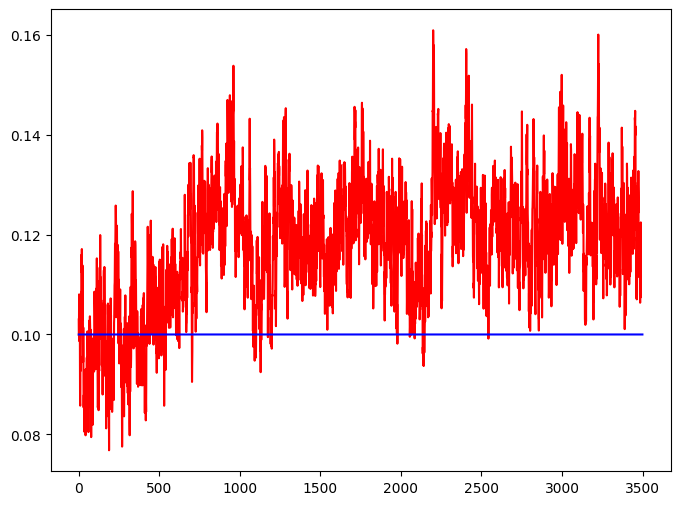

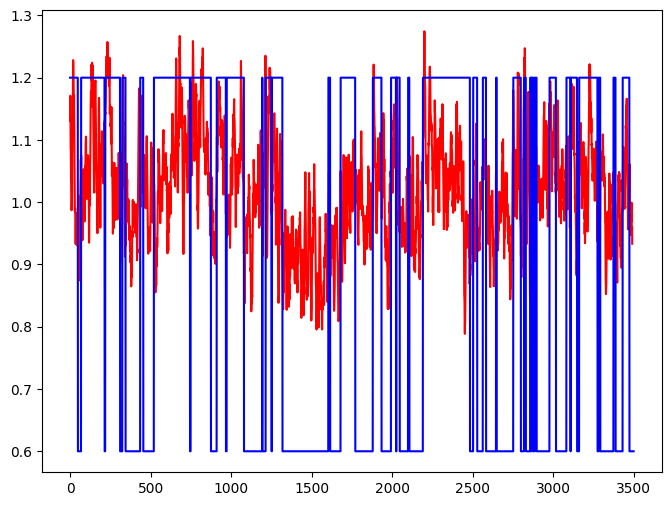

In [26]:
plt.figure()
plt.plot(np.arange(train_result.shape[0]), train_result[:,0], c='red')
plt.plot(np.arange(target_train_df.shape[0]), target_train_df['lb_diff_coefs'], c='blue')

plt.figure()
plt.plot(np.arange(train_result.shape[0]), train_result[:,1], c='red')
plt.plot(np.arange(target_train_df.shape[0]), target_train_df['alphas'], c='blue')

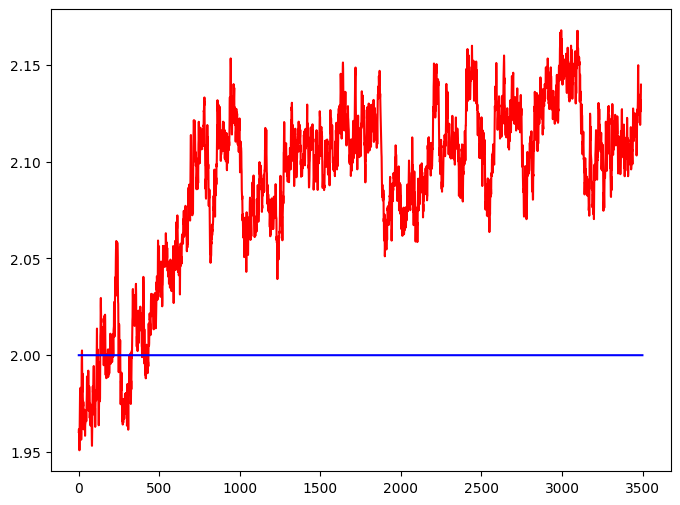

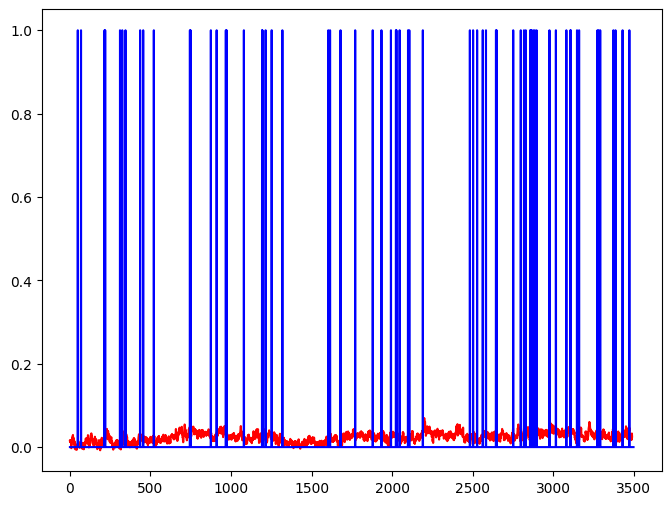

In [27]:
plt.figure()
plt.plot(np.arange(train_result.shape[0]), train_result[:,2], c='red')
plt.plot(np.arange(target_train_df.shape[0]), target_train_df['states'], c='blue')

plt.figure()
plt.plot(np.arange(train_result.shape[0]), train_result[:,3], c='red')
plt.plot(np.arange(target_train_df.shape[0]), target_train_df['cps'], c='blue')

In [25]:
trajectory_object = trajectory_list[12]
trajectory_label = label_list[12]
msd = trajectory_object.get_msd(time_interval=TIME_INTERVAL)
diff_coefs = trajectory_object.get_diffusion_coefs(time_interval=TIME_INTERVAL)
angles = trajectory_object.get_trajectory_angles(time_interval=TIME_INTERVAL)

xs = trajectory_object.get_positions()[:,0]
ys = trajectory_object.get_positions()[:,1]
xs -= xs[0]
ys -= ys[0]

labeled_diff_coefs = trajectory_label[0]
labeled_alphas = trajectory_label[1]
labeled_states = trajectory_label[2]
labeled_cps = trajectory_label[3]

train_df = np.array([xs, ys, msd, diff_coefs, angles]).T
train_df = pd.DataFrame(train_df, columns=['xs', 'ys', 'msd', 'diff_coefs', 'angles'])
target_df = np.array([labeled_diff_coefs, labeled_alphas, labeled_states, labeled_cps]).T
target_df = pd.DataFrame(target_df, columns=['lb_diff_coefs', 'alphas', 'states', 'cps'])

test_ = make_prediction_set(train_df, WINDOW_WIDTH)
test_result = residual_lstm.predict(test_)

6/6 [==============================] - 1s 151ms/step


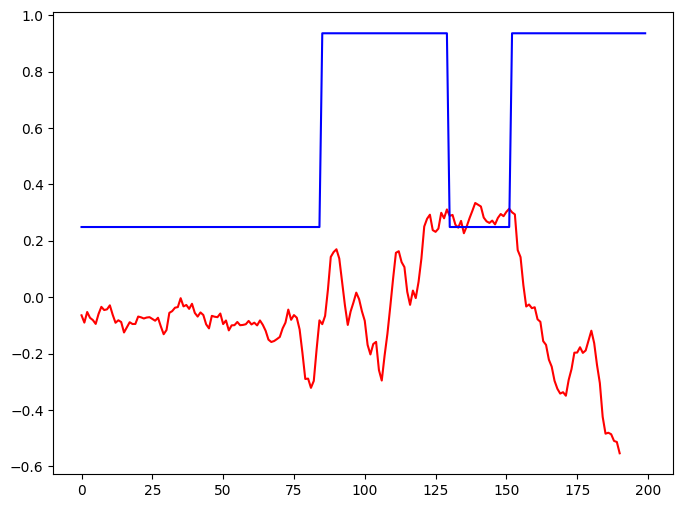

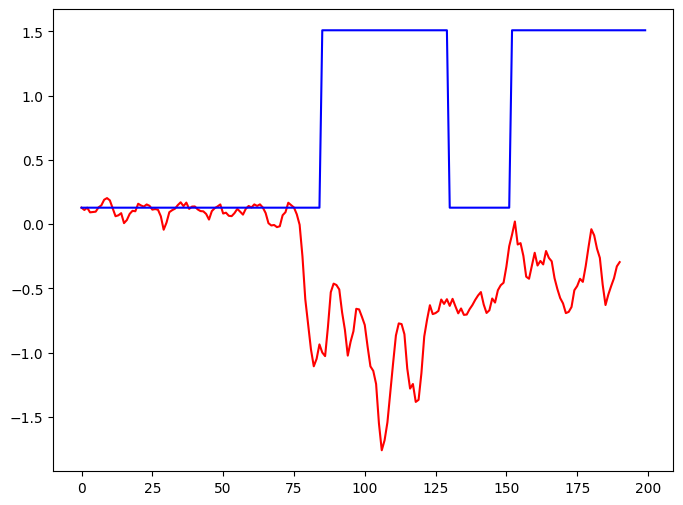

In [26]:
plt.figure()
plt.plot(np.arange(test_result.shape[0]), test_result[:,0], c='red')
plt.plot(np.arange(target_df.shape[0]), target_df['lb_diff_coefs'], c='blue')

plt.figure()
plt.plot(np.arange(test_result.shape[0]), test_result[:,1], c='red')
plt.plot(np.arange(target_df.shape[0]), target_df['alphas'], c='blue')